In [2]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
from tensorflow.keras import datasets

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
import matplotlib.pyplot as plt

5


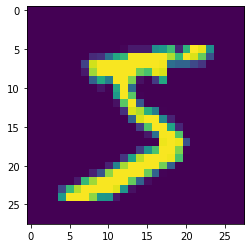

In [5]:
plt.imshow(x_train[0,:,:])
print(y_train[0])

In [6]:
len(y_train),len(y_test)

(60000, 10000)

In [7]:
X_train = torch.from_numpy(x_train).unsqueeze(1).float()
X_test = torch.from_numpy(x_test).unsqueeze(1).float()
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [21]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5,padding=2)
        self.act1 = torch.nn.Sigmoid()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2,stride=2)
        
        self.conv2 = torch.nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,padding=0)
        self.act2 = torch.nn.Sigmoid()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2,stride=2)
        
        self.fc1 = torch.nn.Linear(5*5*16,120)
        self.act3 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(120,84)
        self.act4 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(84,10)
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        return(x)

mn_net = LeNet5()

In [23]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mn_net = mn_net.to(device)
print(device)

cuda:0


In [51]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mn_net.parameters(),lr=1.0e-2,momentum=0.6)

In [ ]:
batch_size =100
test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(y_train))
    for start_ind in range(0,len(y_train),batch_size):
        optimizer.zero_grad()
        
        batch_index = order[start_ind:start_ind+batch_size]
        
        X_train_batch = X_train[batch_index].to(device)
        y_train_batch = y_train[batch_index].to(device)
        
        pred = mn_net.forward(X_train_batch)
        
        loss_f = loss(pred,y_train_batch)
        
        loss_f.backward()
        
        optimizer.step()
        
    test_preds = mn_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

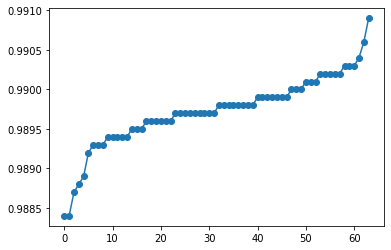

In [61]:
# print(sorted(test_accuracy_history))
x = [i for i in range(len(test_accuracy_history))]

plt.plot(x,sorted(test_accuracy_history),'-o')

In [16]:
mn_net.forward(X_test)

tensor([[-2.4870e+00,  1.3474e+00, -8.8026e-01,  ...,  2.1544e+01,
         -2.6570e+00,  2.7349e+00],
        [ 2.0572e-02, -1.6714e+00,  2.8088e+01,  ..., -6.6696e+00,
          6.7972e+00, -6.7418e+00],
        [-4.3284e+00,  2.6453e+01, -4.8434e+00,  ...,  4.4702e-01,
          4.5734e+00, -6.6619e+00],
        ...,
        [-7.3814e+00, -6.7875e+00, -4.8828e+00,  ...,  8.9876e-01,
         -5.9371e-01,  7.9121e+00],
        [-7.3723e-01, -3.3874e+00, -8.6237e+00,  ..., -6.5380e+00,
          6.8730e+00, -4.8327e+00],
        [ 5.4529e+00, -3.4706e+00, -2.2715e+00,  ..., -1.3712e+01,
         -4.6084e+00, -7.0596e+00]], device='cuda:0', grad_fn=<AddmmBackward0>)

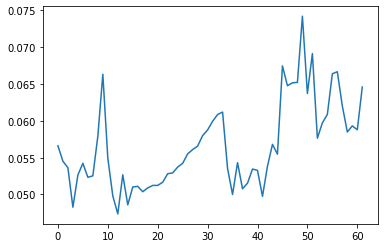

In [17]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);
